## Matplotlib 을 활용한 3D visualization
- 3D Axes(of class Axes3D) are created by passing the projection="3d" keyword argument to Figure.add_subplot
    - (3D 축은 projection = '3d'를 add_subplot에 인수를 전달함으로써 생성할 수 있습니다.)
- Multiple 3D subplots can be added on the same figure, as for 2D subplots.
    - (2D에서 subplot을 사용하여 plot을 추가한 것처럼 3D도 동일합니다.)

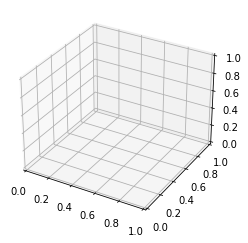

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# Line plot

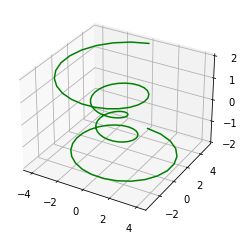

In [20]:
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
theta = np.linspace(-4* np.pi, 4*np.pi, 100)
# np.linespace는 일정한 값의 간격을 균등하게 나타낸다.
# 수평 축을 만들때 유용합니다.
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, c ='green')

# Scatter plot

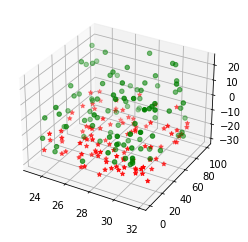

In [21]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

n = 100
for c, m, zlow, zhigh in [('g', 'o', 25, -25), ('r', '*', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)    
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker = m)

plt.show()

# Wireframe plots
- 해당 인터페이스 배치와 요소의 흐름

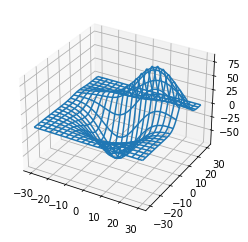

In [40]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
x, y, z = axes3d.get_test_data(0.03)

ax.plot_wireframe(x, y, z, rstride = 10, cstride = 10)
plt.show()

# Surface plots

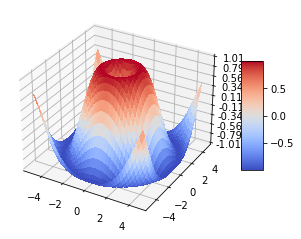

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(X, Y)
# Sparse 를 활용하면, 메모리를 절약할 수 있습니다.
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
# plot the surfacen True. , antialiased 는 선으로 나타낼 것인가 면으로 나타낼 것인가.
surf = ax.plot_surface(X, Y, Z, cmap =cm.coolwarm , linewidth = 0, antialiased=False)

# Z축 커스텀마이징
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# zlim의 개수 지정
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.5 , aspect = 5)

plt.show()

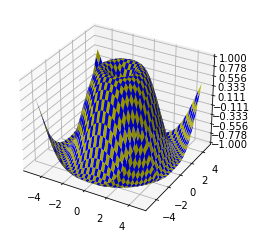

In [22]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype = str)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

surf = ax.plot_surface(X, Y, Z, facecolors = colors, linewidth = 0)

ax.set_zlim(-1, 1)
ax.w_zaxis.set_major_locator(LinearLocator(10))

plt.show()

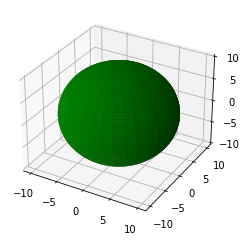

In [28]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

u = np.linspace(0, 3*np.pi, 100)
v = np.linspace(0, np.pi , 100)
x = 10*np.outer(np.cos(u), np.sin(v))
y = 10*np.outer(np.sin(u), np.sin(v))
z = 10*np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, color = 'green')
plt.show()

# Tri - Surface plots

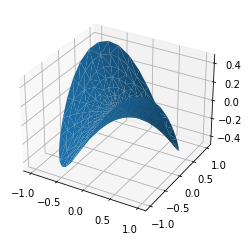

In [53]:
import matplotlib.pyplot as plt
import numpy as np

n_radii = 8
n_angles = 36

radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint = False)[..., np.newaxis]
# np.newaxis를 사용하면 차원이 한개 증가합니다.

# Flatten을 이용하여, 2차원 배열을 1차원 배열로 형성 한 것이다.
x = (radii* np.cos(angles)).flatten()
y = (radii* np.sin(angles)).flatten()

z = np.sin(x*-y)
ax = plt.figure().add_subplot(projection = '3d')
ax.plot_trisurf(x, y, z, linewidth = 0.2, antialiased = True)
plt.show()

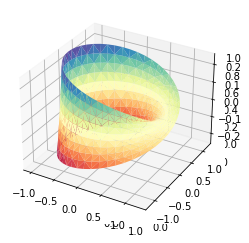

In [70]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib as cm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as mtri

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# endpoint 마지막 숫자를 포함할 것인지 아닌지에 대한 지정
u = np.linspace(0, 2.0*np.pi, endpoint = True, num = 50)
v = np.linspace(-0.5, 0.5, endpoint = True, num = 10)

u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

x = (1 + 0.5*v*np.cos(u / 2.0))* np.cos(u)
y = (1 + 0.5*v*np.cos(u / 2.0))* np.sin(u)
z = 0.5*v*np.sin(u / 2.0)

tri = mtri.Triangulation(u , v)

ax = fig.add_subplot( projection = '3d')
ax.plot_trisurf(x, y, z, triangles = tri.triangles, cmap = plt.cm.Spectral)

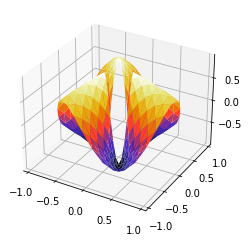

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint = False)
# 배열을 몇번 반복하여, 추가할 것인지를 의미한다.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis = 1)
angles[:, 1::2] += np.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

triang = mtri.Triangulation(x, y)

xmid = x[triang.triangles].mean(axis = 1)
ymid = y[triang.triangles].mean(axis = 1)
mask = xmid**2 + ymid**2 < min_radius**2
triang.set_mask(mask)

ax.plot_trisurf(triang, z, cmap = plt.cm.CMRmap)
plt.show()

# Contour plots

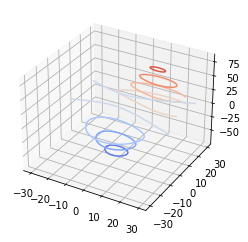

In [80]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, cmap = cm.coolwarm)
ax.clabel(cset, fontsize = 9, inline = 1)

plt.show()

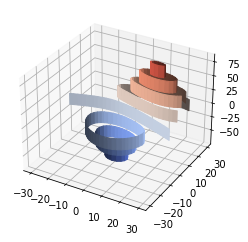

In [84]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

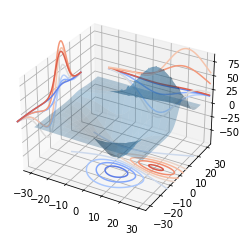

In [94]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
X, Y, Z = axes3d.get_test_data(0.05)
# offset 이라는 것은 위치의 변화를 주기위함이다.
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

plt.show()

# Filled contour plots

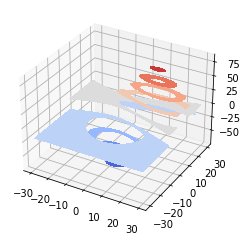

In [97]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

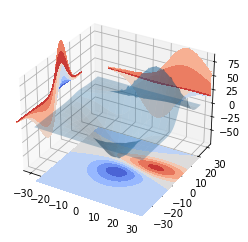

In [106]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
X, Y, Z = axes3d.get_test_data(0.05)
# offset 이라는 것은 위치의 변화를 주기위함이다.
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

plt.show()

# Polygon plots

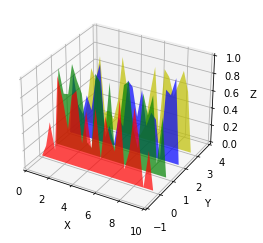

In [124]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

def cc(arg):
    return mcolors.to_rgba(arg, alpha = 0.6)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]

for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors =[cc('r'), cc('g'), cc('b'), cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs = zs, zdir = 'y')
ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()

# Bar plots

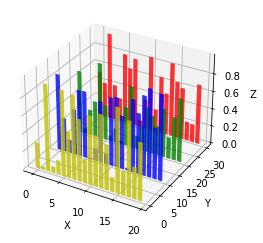

In [137]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)
    ax.bar(xs, ys, zs=z, zdir='y', color=c, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Plot 2D data on 3D plot

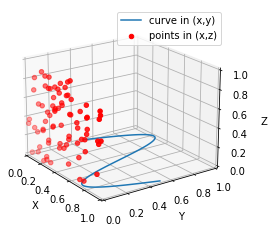

In [154]:

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')
x = np.random.sample(20*len(colors))
y = np.random.sample(20*len(colors))

ax.scatter(x, y, zs=0, c = 'r', zdir='y', label='points in (x,z)')

ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 각 변경
ax.view_init(elev=20., azim=-35)

plt.show()
